### 1. Greedy Technique
### 2. A* Algorithm

# Graph and heuristics

In [3]:
# Heuristics data
import queue
def getHeuristics():
    heuristics = {
        'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Dobreta': 242,
        'Eforie': 161, 'Fagaras': 178, 'Giurgiu': 77, 'Hirsova': 151,
        'Iasi': 226, 'Lugoj': 244, 'Mehadia': 241, 'Neamt': 234,
        'Oradea': 380, 'Pitesti': 98, 'Rimnicu_Vilcea': 193, 'Sibiu': 253,
        'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199, 'Zerind': 374
    }
    return heuristics
# Cities location data 
def getCity():
    city = {
        'Arad': [29, 192], 'Bucharest': [268, 55], 'Craiova': [163, 22],
        'Dobreta': [91, 32], 'Eforie': [420, 28], 'Fagaras': [208, 157],
        'Giurgiu': [264, 8], 'Hirsova': [396, 74], 'Iasi': [347, 204],
        'Lugoj': [91, 98], 'Mehadia': [93, 65], 'Neamt': [290, 229],
        'Oradea': [62, 258], 'Pitesti': [220, 88], 'Rimnicu_Vilcea': [147, 124],
        'Sibiu': [126, 164], 'Timisoara': [32, 124], 'Urziceni': [333, 74],
        'Vaslui': [376, 153], 'Zerind': [44, 225]
    }
    citiesCode = {
        1: 'Arad', 2: 'Bucharest', 3: 'Craiova', 4: 'Dobreta',
        5: 'Eforie', 6: 'Fagaras', 7: 'Giurgiu', 8: 'Hirsova',
        9: 'Iasi', 10: 'Lugoj', 11: 'Mehadia', 12: 'Neamt',
        13: 'Oradea', 14: 'Pitesti', 15: 'Rimnicu_Vilcea', 16: 'Sibiu',
        17: 'Timisoara', 18: 'Urziceni', 19: 'Vaslui', 20: 'Zerind'
    }
    return city, citiesCode
# Graph data 
def createGraph():
    graph = {
        'Arad': [['Sibiu', 140], ['Timisoara', 118], ['Zerind', 75]],
        'Sibiu': [['Arad', 140], ['Fagaras', 99], ['Oradea', 151], ['Rimnicu_Vilcea', 80]],
        'Timisoara': [['Arad', 118], ['Lugoj', 111]],
        'Zerind': [['Arad', 75], ['Oradea', 71]],
        'Bucharest': [['Fagaras', 211], ['Giurgiu', 90], ['Pitesti', 101], ['Urziceni', 85]],
        'Fagaras': [['Bucharest', 211], ['Sibiu', 99]],
        'Giurgiu': [['Bucharest', 90]],
        'Pitesti': [['Bucharest', 101], ['Craiova', 138], ['Rimnicu_Vilcea', 97]],
        'Urziceni': [['Bucharest', 85], ['Hirsova', 98], ['Vaslui', 142]],
        'Craiova': [['Dobreta', 120], ['Pitesti', 138], ['Rimnicu_Vilcea', 146]],
        'Dobreta': [['Craiova', 120], ['Mehadia', 75]],
        'Mehadia': [['Dobreta', 75], ['Lugoj', 70]],
        'Lugoj': [['Mehadia', 70], ['Timisoara', 111]],
        'Oradea': [['Sibiu', 151], ['Zerind', 71]],
        'Rimnicu_Vilcea': [['Craiova', 146], ['Pitesti', 97], ['Sibiu', 80]],
        'Hirsova': [['Eforie', 86], ['Urziceni', 98]],
        'Eforie': [['Hirsova', 86]],
        'Iasi': [['Neamt', 87], ['Vaslui', 92]],
        'Neamt': [['Iasi', 87]],
        'Vaslui': [['Iasi', 92], ['Urziceni', 142]]
    }
    return graph

##### 1. Greedy Technique

In [10]:
def GBFS(startNode, heuristics, graph, goalNode="Bucharest"):
     # Initialize priority queue that stores (priority, node, path, cost)
    priorityQueue = queue.PriorityQueue()                 # These will be ordered by first number:
                                                          #   (10, 'NodeA', ['path'], 5)
                                                           #(5, 'NodeB', ['path'], 3)   # This comes first!
                                                           #(10, 'NodeC', ['path'], 7)
    priorityQueue.put((heuristics[startNode], startNode, [startNode], 0))
    #track visited nodes to avoid cycles
    visited = set()
    
    while not priorityQueue.empty():
        _, current, path, cost = priorityQueue.get()
        
        if current == goalNode:
            return path, cost   # return true path and cost directly
        
        if current in visited:
            continue
            
        visited.add(current)
        
        for neighbor, edge_cost in graph[current]:
            if neighbor not in visited:
                new_cost = cost + int(edge_cost)   # Accumulate path cost
                new_path = path + [neighbor]       # Extend path
                #queue prioritize node having min heuristic,
                #uses only heuristic value to decide exploration order
                priorityQueue.put((heuristics[neighbor], neighbor, new_path, new_cost))
    
    return [], 0  # No path found
path, cost = GBFS("Arad", getHeuristics(), createGraph())
print(path, cost)
# ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450

['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] 450


##### 2. A* Algorithm

In [12]:
def Astar(startNode, heuristics, graph, goalNode="Bucharest"):
    priorityQueue = queue.PriorityQueue()
    #Dictionary that remembers the cheapest path cost found to each node
     #Tracks best known cost to reach each node
    #this is what makes A* optimal. It remembers the cheapest path found to each node so far.
    cost_so_far = {}
    cost_so_far[startNode] = 0
    priorityQueue.put((heuristics[startNode], startNode, [startNode], 0))
    
    while not priorityQueue.empty():
        _, current, path, current_cost = priorityQueue.get()
        
        if current == goalNode:
            return path, current_cost   # return true path and cost directly
        #If we previously found a cheaper path to this node, skip processing
        if current_cost > cost_so_far.get(current, float('inf')):
            continue
            
        for neighbor, edge_cost in graph[current]:
            new_cost = current_cost + int(edge_cost)# g(neighbor)
            
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost## Update best known cost
                total_estimated_cost = new_cost + heuristics[neighbor]#f(neighbor) = g(neighbor) + h(neighbor)
                new_path = path + [neighbor]
                priorityQueue.put((total_estimated_cost, neighbor, new_path, new_cost))
    
    return [], 0  # No path found
path, cost = Astar("Arad", getHeuristics(), createGraph())
print(path, cost)
# ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest'] 418

['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest'] 418


### Visualization

Available Cities:
 1. Arad
 2. Bucharest
 3. Craiova
 4. Dobreta
 5. Eforie
 6. Fagaras
 7. Giurgiu
 8. Hirsova
 9. Iasi
10. Lugoj
11. Mehadia
12. Neamt
13. Oradea
14. Pitesti
15. Rimnicu_Vilcea
16. Sibiu
17. Timisoara
18. Urziceni
19. Vaslui
20. Zerind



Please enter your desired city's number (0 for exit):  20



Finding paths from Zerind to Bucharest...
GBFS Path: Zerind → Arad → Sibiu → Fagaras → Bucharest
GBFS Path Cost: 525
A* Path: Zerind → Arad → Sibiu → Rimnicu_Vilcea → Pitesti → Bucharest
A* Path Cost: 493
A* found a better path than GBFS!

A* explored 6 nodes in the final path
GBFS explored 5 nodes in the final path


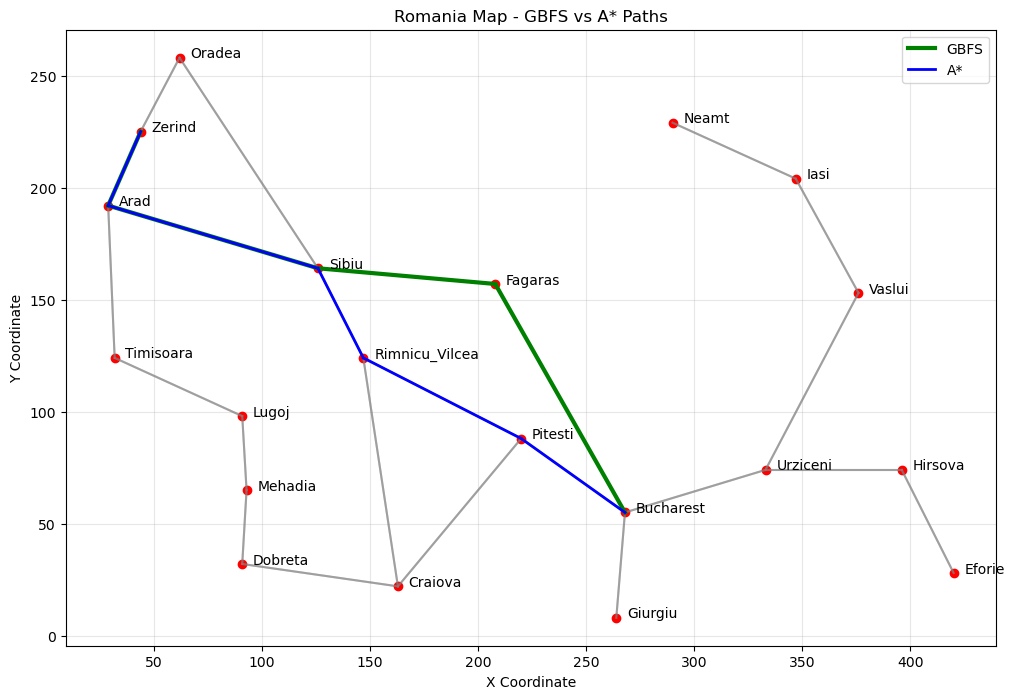


Please enter your desired city's number (0 for exit):  0


Exiting...


In [13]:
import queue
import matplotlib.pyplot as plt
# Greedy Best First Search Algorithm
def GBFS(startNode, heuristics, graph, goalNode="Bucharest"):
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((heuristics[startNode], startNode, [startNode], 0))
    
    visited = set()
    
    while not priorityQueue.empty():
        _, current, path, cost = priorityQueue.get()
        
        if current == goalNode:
            return path, cost
        
        if current in visited:
            continue
            
        visited.add(current)
        
        for neighbor, edge_cost in graph[current]:
            if neighbor not in visited:
                new_cost = cost + int(edge_cost)
                new_path = path + [neighbor]
                priorityQueue.put((heuristics[neighbor], neighbor, new_path, new_cost))
    
    return [], 0  # No path found

# Astar Algorithm with proper cost_so_far tracking
def Astar(startNode, heuristics, graph, goalNode="Bucharest"):
    priorityQueue = queue.PriorityQueue()
    # Dictionary to track best cost to reach each node
    cost_so_far = {}
    
    # Initialize start node
    cost_so_far[startNode] = 0
    priorityQueue.put((heuristics[startNode], startNode, [startNode], 0))
    
    while not priorityQueue.empty():
        _, current, path, current_cost = priorityQueue.get()
        
        # If we found the goal, return the path and cost
        if current == goalNode:
            return path, current_cost
        
        # If we found a better path to this node already, skip
        if current_cost > cost_so_far.get(current, float('inf')):
            continue
            
        for neighbor, edge_cost in graph[current]:
            new_cost = current_cost + int(edge_cost)
            
            # If this is the first time visiting neighbor OR we found a cheaper path
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                total_estimated_cost = new_cost + heuristics[neighbor]
                new_path = path + [neighbor]
                priorityQueue.put((total_estimated_cost, neighbor, new_path, new_cost))
    
    return [], 0  # No path found

# drawing map of answer
def drawMap(city, gbfs_path, astar_path, graph):
    plt.figure(figsize=(12, 8))
    
    # Plot all cities
    for i, j in city.items():
        plt.plot(j[0], j[1], "ro")
        plt.annotate(i, (j[0] + 5, j[1]))

    # Draw all roads (gray)
    for i, j in city.items():
        for k in graph[i]:
            n = city[k[0]]
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray", alpha=0.5)

    # Draw GBFS path (green)
    for i in range(len(gbfs_path) - 1):
        first = city[gbfs_path[i]]
        second = city[gbfs_path[i + 1]]
        plt.plot([first[0], second[0]], [first[1], second[1]], "green", linewidth=3, 
                label="GBFS" if i == 0 else "")

    # Draw A* path (blue)
    for i in range(len(astar_path) - 1):
        first = city[astar_path[i]]
        second = city[astar_path[i + 1]]
        plt.plot([first[0], second[0]], [first[1], second[1]], "blue", linewidth=2, 
                label="A*" if i == 0 else "")

    plt.legend(loc="upper right")
    plt.title("Romania Map - GBFS vs A* Paths")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True, alpha=0.3)
    plt.show()

# running the program
def main():
    heuristic = getHeuristics()
    graph = createGraph()
    city, citiesCode = getCity()

    print("Available Cities:")
    for i, j in citiesCode.items():
        print(f"{i:2d}. {j}")

    while True:
        try:
            inputCode = int(input("\nPlease enter your desired city's number (0 for exit): "))

            if inputCode == 0:
                print("Exiting...")
                break

            if inputCode not in citiesCode:
                print("Invalid city number! Please try again.")
                continue

            cityName = citiesCode[inputCode]

            print(f"\nFinding paths from {cityName} to Bucharest...")
            
            # Get paths and costs
            gbfs_path, gbfs_cost = GBFS(cityName, heuristic, graph)
            astar_path, astar_cost = Astar(cityName, heuristic, graph)
            
            print("GBFS Path:", " → ".join(gbfs_path))
            print(f"GBFS Path Cost: {gbfs_cost}")
            print("A* Path:", " → ".join(astar_path))
            print(f"A* Path Cost: {astar_cost}")
            
            if gbfs_cost == astar_cost:
                print("Both algorithms found paths with same cost!")
            elif astar_cost < gbfs_cost:
                print("A* found a better path than GBFS!")
            else:
                print("GBFS found a cheaper path (A* should always find optimal path!)")
            
            print(f"\nA* explored {len(astar_path)} nodes in the final path")
            print(f"GBFS explored {len(gbfs_path)} nodes in the final path")
            
            # Draw the map
            drawMap(city, gbfs_path, astar_path, graph)
            
        except ValueError:
            print("Please enter a valid number!")
        except KeyboardInterrupt:
            print("\nExiting...")
            break

if __name__ == "__main__":
    main()

# Optional for me and you to0 

Available Cities:
 1. Arad
 2. Bucharest
 3. Craiova
 4. Dobreta
 5. Eforie
 6. Fagaras
 7. Giurgiu
 8. Hirsova
 9. Iasi
10. Lugoj
11. Mehadia
12. Neamt
13. Oradea
14. Pitesti
15. Rimnicu_Vilcea
16. Sibiu
17. Timisoara
18. Urziceni
19. Vaslui
20. Zerind



Please enter your desired city's number (0 for exit):  1



Finding paths from Arad to Bucharest...
GBFS Path: Arad → Sibiu → Fagaras → Bucharest
GBFS Path Cost: 450 (verified: 450)
A* Path: Arad → Sibiu → Rimnicu_Vilcea → Pitesti → Bucharest
A* Path Cost: 418 (verified: 418)

Heuristic values for GBFS path cities:
  Arad: h = 366
  Sibiu: h = 253
  Fagaras: h = 178
  Bucharest: h = 0

Heuristic values for A* path cities:
  Arad: h = 366
  Sibiu: h = 253
  Rimnicu_Vilcea: h = 193
  Pitesti: h = 98
  Bucharest: h = 0

A* found a better path than GBFS!

A* explored 5 nodes in the final path
GBFS explored 4 nodes in the final path

Drawing map with heuristic values...


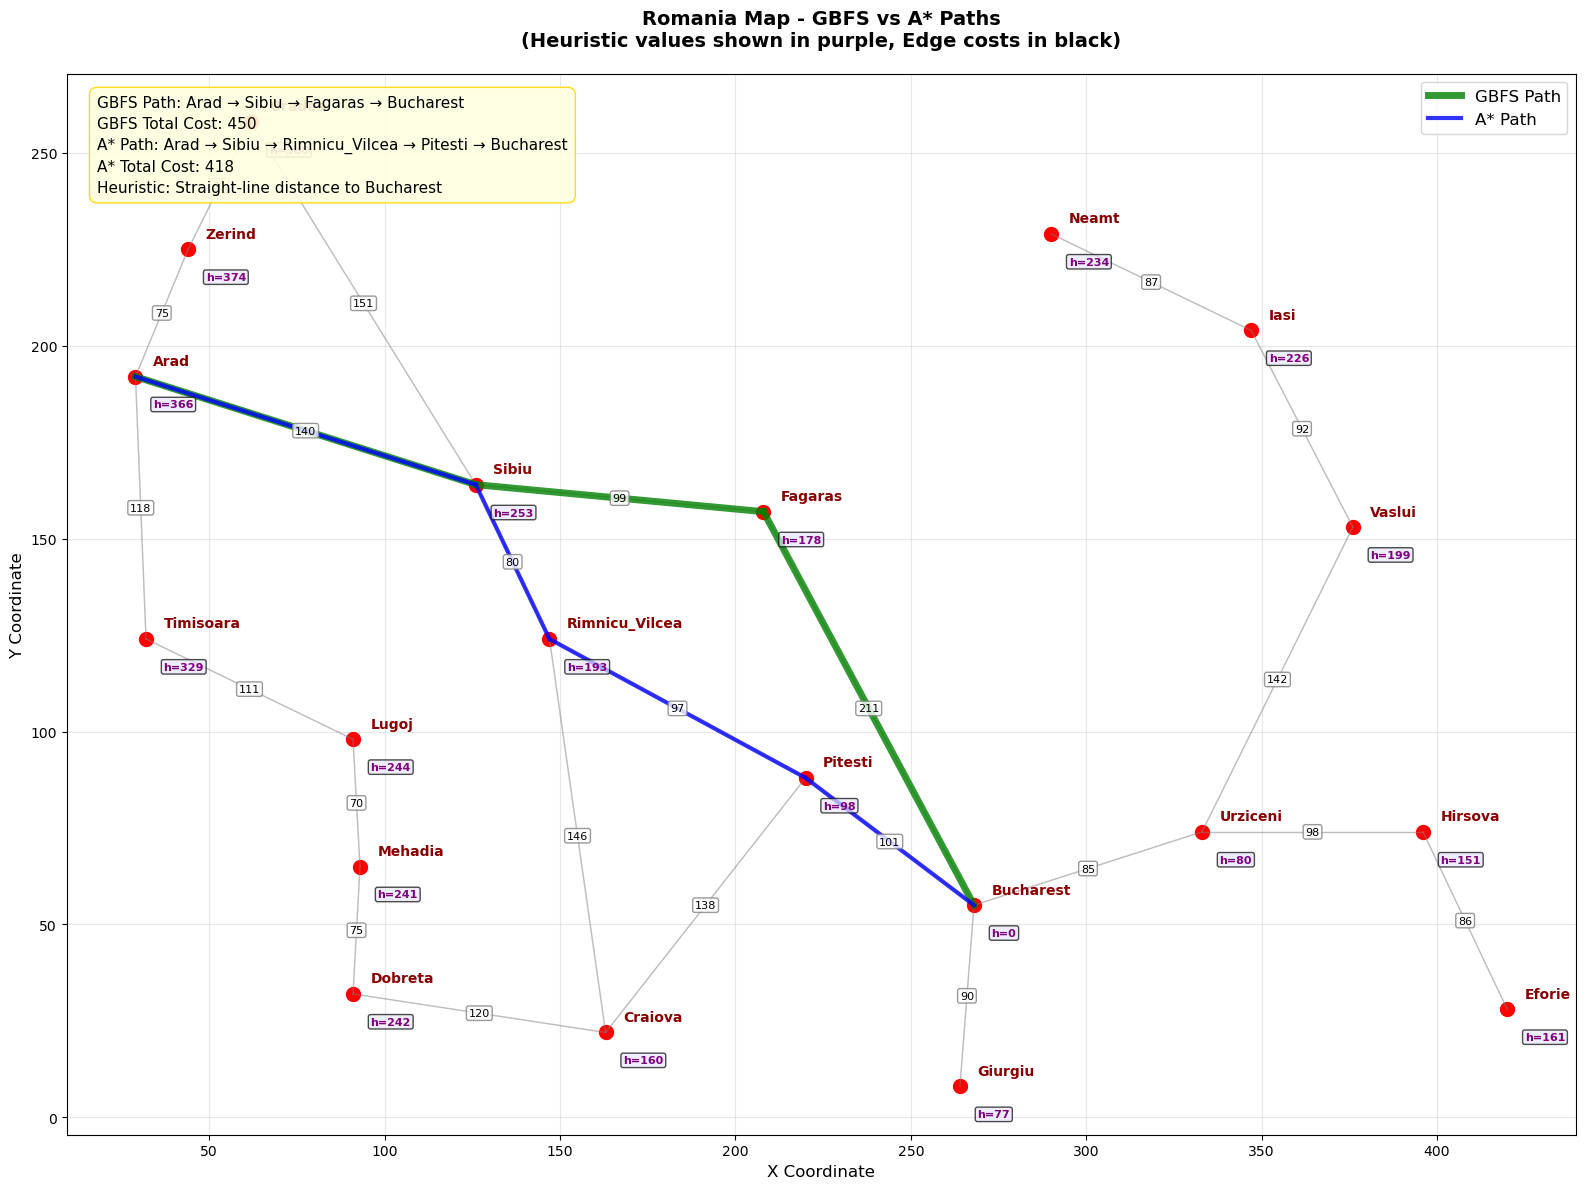


Please enter your desired city's number (0 for exit):  0


Exiting...


In [8]:
import queue
import matplotlib.pyplot as plt

# Greedy Best First Search Algorithm
def GBFS(startNode, heuristics, graph, goalNode="Bucharest"):
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((heuristics[startNode], startNode, [startNode], 0))
    
    visited = set()
    
    while not priorityQueue.empty():
        _, current, path, cost = priorityQueue.get()
        
        if current == goalNode:
            return path, cost
        
        if current in visited:
            continue
            
        visited.add(current)
        
        for neighbor, edge_cost in graph[current]:
            if neighbor not in visited:
                new_cost = cost + int(edge_cost)
                new_path = path + [neighbor]
                priorityQueue.put((heuristics[neighbor], neighbor, new_path, new_cost))
    
    return [], 0  # No path found

# Astar Algorithm with proper cost_so_far tracking
def Astar(startNode, heuristics, graph, goalNode="Bucharest"):
    priorityQueue = queue.PriorityQueue()
    # Dictionary to track best cost to reach each node
    cost_so_far = {}
    
    # Initialize start node
    cost_so_far[startNode] = 0
    priorityQueue.put((heuristics[startNode], startNode, [startNode], 0))
    
    while not priorityQueue.empty():
        _, current, path, current_cost = priorityQueue.get()
        
        # If we found the goal, return the path and cost
        if current == goalNode:
            return path, current_cost
        
        # If we found a better path to this node already, skip
        if current_cost > cost_so_far.get(current, float('inf')):
            continue
            
        for neighbor, edge_cost in graph[current]:
            new_cost = current_cost + int(edge_cost)
            
            # If this is the first time visiting neighbor OR we found a cheaper path
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                total_estimated_cost = new_cost + heuristics[neighbor]
                new_path = path + [neighbor]
                priorityQueue.put((total_estimated_cost, neighbor, new_path, new_cost))
    
    return [], 0  # No path found

# Calculate path cost for a given path
def calculate_path_cost(path, graph):
    if len(path) < 2:
        return 0
    
    total_cost = 0
    for i in range(len(path) - 1):
        current_city = path[i]
        next_city = path[i + 1]
        
        # Find the edge cost between current and next city
        for neighbor, cost in graph[current_city]:
            if neighbor == next_city:
                total_cost += int(cost)
                break
                
    return total_cost

# drawing map of answer with edge costs and heuristic values
def drawMap(city, gbfs_path, astar_path, graph, heuristics):
    plt.figure(figsize=(16, 12))
    
    # Plot all cities with heuristic values
    for city_name, coord in city.items():
        plt.plot(coord[0], coord[1], "ro", markersize=10)
        # City name annotation
        plt.annotate(city_name, (coord[0] + 5, coord[1] + 3), fontsize=10, fontweight='bold', color='darkred')
        # Heuristic value annotation (below city name)
        heuristic_val = heuristics.get(city_name, 0)
        plt.annotate(f"h={heuristic_val}", (coord[0] + 5, coord[1] - 8), fontsize=8, 
                    color='purple', fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='lavender', alpha=0.7))

    # Draw all roads (gray) with cost labels
    edge_labels = {}
    for i, j in city.items():
        for k in graph[i]:
            n = city[k[0]]
            # Draw the edge
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray", alpha=0.3, linewidth=1)
            
            # Calculate midpoint for label
            mid_x = (j[0] + n[0]) / 2
            mid_y = (j[1] + n[1]) / 2
            
            # Store edge label (avoid duplicates)
            edge_key = tuple(sorted([i, k[0]]))
            if edge_key not in edge_labels:
                plt.text(mid_x, mid_y, str(k[1]), fontsize=8, color='black', 
                        ha='center', va='center', 
                        bbox=dict(boxstyle="round,pad=0.2", facecolor='white', 
                                alpha=0.8, edgecolor='gray'))
                edge_labels[edge_key] = True

    # Draw GBFS path (green)
    for i in range(len(gbfs_path) - 1):
        first = city[gbfs_path[i]]
        second = city[gbfs_path[i + 1]]
        plt.plot([first[0], second[0]], [first[1], second[1]], "green", 
                linewidth=5, alpha=0.8, label="GBFS Path" if i == 0 else "")

    # Draw A* path (blue)
    for i in range(len(astar_path) - 1):
        first = city[astar_path[i]]
        second = city[astar_path[i + 1]]
        plt.plot([first[0], second[0]], [first[1], second[1]], "blue", 
                linewidth=3, alpha=0.8, label="A* Path" if i == 0 else "")

    # Add detailed information box
    gbfs_cost = calculate_path_cost(gbfs_path, graph)
    astar_cost = calculate_path_cost(astar_path, graph)
    
    info_text = (
        f"GBFS Path: {' → '.join(gbfs_path)}\n"
        f"GBFS Total Cost: {gbfs_cost}\n"
        f"A* Path: {' → '.join(astar_path)}\n"
        f"A* Total Cost: {astar_cost}\n"
        f"Heuristic: Straight-line distance to Bucharest"
    )
    
    plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
            fontsize=11, color='black', fontweight='normal',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', 
                     alpha=0.9, edgecolor='gold'),
            verticalalignment='top', linespacing=1.5)

    plt.legend(loc="upper right", fontsize=12)
    plt.title("Romania Map - GBFS vs A* Paths\n(Heuristic values shown in purple, Edge costs in black)", 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel("X Coordinate", fontsize=12)
    plt.ylabel("Y Coordinate", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Alternative visualization with heuristic values inside city nodes
def drawMapAlternative(city, gbfs_path, astar_path, graph, heuristics):
    """Alternative visualization with heuristic values integrated into city markers"""
    plt.figure(figsize=(16, 12))
    
    # Plot all cities with heuristic values as part of the marker
    for city_name, coord in city.items():
        # Draw city marker
        plt.plot(coord[0], coord[1], "o", markersize=15, 
                markerfacecolor='lightcoral', markeredgecolor='darkred', markeredgewidth=2)
        
        # City name and heuristic in the same annotation
        heuristic_val = heuristics.get(city_name, 0)
        city_label = f"{city_name}\n(h={heuristic_val})"
        plt.annotate(city_label, (coord[0], coord[1]), 
                    fontsize=8, fontweight='bold', 
                    ha='center', va='center',
                    bbox=dict(boxstyle="circle,pad=0.3", facecolor='white', alpha=0.8))

    # Draw all roads (gray) with cost labels
    edge_labels = {}
    for i, j in city.items():
        for k in graph[i]:
            n = city[k[0]]
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray", alpha=0.3, linewidth=1)
            
            # Edge cost labels
            mid_x = (j[0] + n[0]) / 2
            mid_y = (j[1] + n[1]) / 2
            edge_key = tuple(sorted([i, k[0]]))
            if edge_key not in edge_labels:
                plt.text(mid_x, mid_y, str(k[1]), fontsize=8, color='black', 
                        ha='center', va='center', 
                        bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
                edge_labels[edge_key] = True

    # Draw paths
    for i in range(len(gbfs_path) - 1):
        first = city[gbfs_path[i]]
        second = city[gbfs_path[i + 1]]
        plt.plot([first[0], second[0]], [first[1], second[1]], "green", 
                linewidth=5, alpha=0.7, label="GBFS" if i == 0 else "")

    for i in range(len(astar_path) - 1):
        first = city[astar_path[i]]
        second = city[astar_path[i + 1]]
        plt.plot([first[0], second[0]], [first[1], second[1]], "blue", 
                linewidth=3, alpha=0.7, label="A*" if i == 0 else "")

    # Add information
    gbfs_cost = calculate_path_cost(gbfs_path, graph)
    astar_cost = calculate_path_cost(astar_path, graph)
    
    plt.text(0.02, 0.98, f"GBFS Cost: {gbfs_cost}", transform=plt.gca().transAxes,
            fontsize=12, color='green', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.8))
    
    plt.text(0.02, 0.93, f"A* Cost: {astar_cost}", transform=plt.gca().transAxes,
            fontsize=12, color='blue', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.8))

    plt.legend(loc="upper right", fontsize=12)
    plt.title("Romania Map - GBFS vs A* Paths with Heuristic Values", fontsize=14, fontweight='bold')
    plt.xlabel("X Coordinate", fontsize=12)
    plt.ylabel("Y Coordinate", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# running the program
def main():
    heuristic = getHeuristics()
    graph = createGraph()
    city, citiesCode = getCity()

    print("Available Cities:")
    for i, j in citiesCode.items():
        print(f"{i:2d}. {j}")

    while True:
        try:
            inputCode = int(input("\nPlease enter your desired city's number (0 for exit): "))

            if inputCode == 0:
                print("Exiting...")
                break

            if inputCode not in citiesCode:
                print("Invalid city number! Please try again.")
                continue

            cityName = citiesCode[inputCode]

            print(f"\nFinding paths from {cityName} to Bucharest...")
            
            # Get paths and costs
            gbfs_path, gbfs_cost = GBFS(cityName, heuristic, graph)
            astar_path, astar_cost = Astar(cityName, heuristic, graph)
            
            # Verify costs by calculating from path
            gbfs_verified_cost = calculate_path_cost(gbfs_path, graph)
            astar_verified_cost = calculate_path_cost(astar_path, graph)
            
            print("GBFS Path:", " → ".join(gbfs_path))
            print(f"GBFS Path Cost: {gbfs_cost} (verified: {gbfs_verified_cost})")
            print("A* Path:", " → ".join(astar_path))
            print(f"A* Path Cost: {astar_cost} (verified: {astar_verified_cost})")
            
            # Display heuristic values for the path cities
            print("\nHeuristic values for GBFS path cities:")
            for path_city in gbfs_path:
                print(f"  {path_city}: h = {heuristic[path_city]}")
            
            print("\nHeuristic values for A* path cities:")
            for path_city in astar_path:
                print(f"  {path_city}: h = {heuristic[path_city]}")
            
            if gbfs_cost == astar_cost:
                print("\nBoth algorithms found paths with same cost!")
            elif astar_cost < gbfs_cost:
                print("\nA* found a better path than GBFS!")
            else:
                print("\nGBFS found a cheaper path (A* should always find optimal path!)")
            
            print(f"\nA* explored {len(astar_path)} nodes in the final path")
            print(f"GBFS explored {len(gbfs_path)} nodes in the final path")
            
            # Draw the map with heuristic values
            print("\nDrawing map with heuristic values...")
            drawMap(city, gbfs_path, astar_path, graph, heuristic)
            
            # Uncomment the line below to see the alternative visualization
            # drawMapAlternative(city, gbfs_path, astar_path, graph, heuristic)
            
        except ValueError:
            print("Please enter a valid number!")
        except KeyboardInterrupt:
            print("\nExiting...")
            break

if __name__ == "__main__":
    main()